# Project 2

## Northwind Traders Database - ERD

<img src='Northwind_ERD.png'>

<i>NOTE -  all table names in the sinular NOT plural

In [1]:
#import basic libraries
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#connect to databse
conn= sqlite3.connect('Northwind_small.sqlite')
cursor=conn.cursor()

In [3]:
#get table names
tables=cursor.execute('''SELECT name FROM sqlite_master WHERE TYPE = "table"''').fetchall()
tables
# note all table names in the SINGULAR
# 'Order' is reserved word in SQL will need to enclose in [] -- [order]

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

### 1. Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?

Begin by viewing the OrderDetail table to ascertain what kinds of discounts are being given and how frequently

In [4]:
# import table from database to pandas dataframe and view head
OD=pd.read_sql('''SELECT * FROM OrderDetail''',conn)
OD.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [5]:
#relevant features - ProductId, Quantity, Discount
OD=OD[['ProductId','Quantity','Discount']]
OD.head()

,ProductId,Quantity,Discount
0,11,12,0.0
1,42,10,0.0
2,72,5,0.0
3,14,9,0.0
4,51,40,0.0


In [6]:
OD.describe()

,ProductId,Quantity,Discount
count,2155.000000,2155.000000,2155.000000
mean,40.793039,23.812993,0.056167
std,22.159019,19.022047,0.083450
min,1.000000,1.000000,0.000000
25%,22.000000,10.000000,0.000000
50%,41.000000,20.000000,0.000000
75%,60.000000,30.000000,0.100000
max,77.000000,130.000000,0.250000


In [7]:
OD.Discount.value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

Products are ordered in quantities ranging form 1 to 130 with discounts from 0.00 (no discount) to 0.25 (25%)

number of orders by product

In [8]:
OD.ProductId.value_counts()

59    54
31    51
24    51
60    51
56    50
62    48
41    47
75    46
2     44
16    43
71    42
40    41
13    40
70    39
76    39
51    39
21    39
72    38
11    38
77    38
1     38
19    37
17    37
54    36
35    36
68    34
55    33
28    33
10    33
29    32
      ..
38    24
57    23
14    22
49    21
47    21
23    20
4     20
34    19
58    18
25    18
63    17
20    16
32    15
12    14
73    14
45    14
22    14
8     13
74    13
3     12
6     12
67    10
50    10
5     10
27     9
66     8
48     6
15     6
37     6
9      5
Name: ProductId, Length: 77, dtype: int64

How are products discounted? Are products always given the same discount level?

In [9]:
OD.loc[OD.ProductId==59]['Discount'].value_counts()

0.00    34
0.05     7
0.15     6
0.20     3
0.10     2
0.25     2
Name: Discount, dtype: int64

NOPE

There are 77 different products, is every product sold with a discount some of the time?

In [10]:
len(OD.loc[OD.Discount>0]['ProductId'].value_counts())

77

YES

Too many different products to examine individually many of which have too few sales for analysis by product.

Analysis by discount level vs non-discounted still viable with discount level with very few orders a binned to 0.05

In [11]:
for i in [0.01,0.02,0.03,0.04,0.06]:
    OD.Discount.replace(to_replace=i,value=0.05,inplace=True)
OD.Discount.value_counts()

0.00    1317
0.05     193
0.10     173
0.20     161
0.15     157
0.25     154
Name: Discount, dtype: int64

In [12]:
OD.Discount.unique()

array([0.  , 0.15, 0.05, 0.2 , 0.25, 0.1 ])

Visualize each discount level with a distribution plot

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


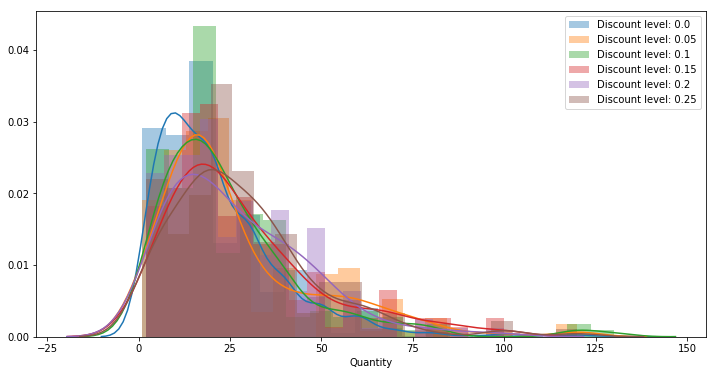

In [13]:
plt.figure(figsize=(12,6))
for i in sorted(OD.Discount.unique()):
    sns.distplot(OD.loc[OD.Discount==i]['Quantity'], label='Discount level: '+str(i), bins =20)
#     plt.legend()
#     plt.show()
plt.legend()

Overlayed distplots are hard to judge, visualize each individually as well

C:\Users\kosta\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


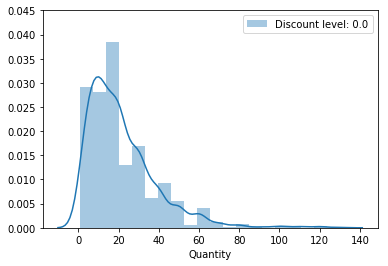

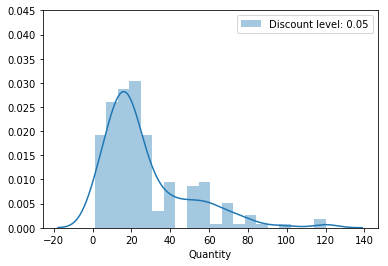

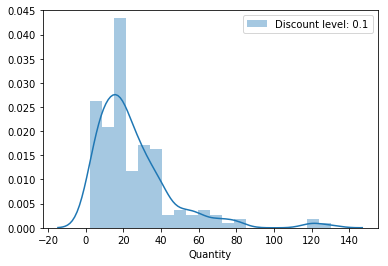

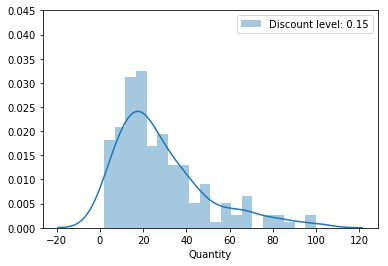

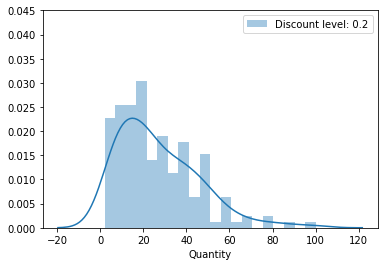

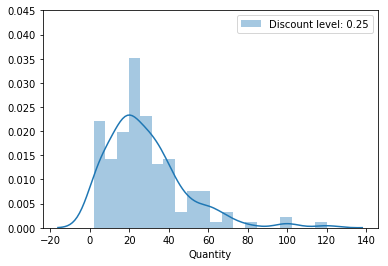

In [168]:
for i in sorted(OD.Discount.unique()):
    sns.distplot(OD.loc[OD.Discount==i]['Quantity'], label='Discount level: '+str(i), bins =20)
    plt.ylim(0,0.045) #(standardize y-axis)
    plt.legend()
    plt.show()

Skewed distributions with long tails

Null hyposthesis: no difference in Quantity ordered mean (Qmu) for discount = 0 and any other discount level

H0:  Qmu_discount == mu_nodiscount for each discount level

ALternative hypothesis: discounts result in increased sales volume 

H1:  Qmu_discount != mu_nodiscount for each discount level

To test this hypothesis we will conduct a 2 sample t- test with unequal variance (Welch's t-test) between no discount and each discount level with p value threshold = 0.05 to reject the null hypothesis

In [15]:
from scipy import stats

In [16]:
Q_nodiscount=OD.loc[OD.Discount==0]['Quantity']
Q_5pc_discount=OD.loc[OD.Discount==0.05]['Quantity']
Q_10pc_discount=OD.loc[OD.Discount==0.10]['Quantity']
Q_15pc_discount=OD.loc[OD.Discount==0.15]['Quantity']
Q_20pc_discount=OD.loc[OD.Discount==0.20]['Quantity']
Q_25pc_discount=OD.loc[OD.Discount==0.25]['Quantity']

In [21]:
rate=0.05
for disc in [Q_5pc_discount,Q_10pc_discount, Q_15pc_discount, Q_20pc_discount,Q_25pc_discount]:
    t_stat, p= stats.ttest_ind(Q_nodiscount,disc,equal_var=False)#Welch's T-test for unequal variance
    if p<0.05:
        status="REJECT"
    else:
        status="ACCEPT"
    print(f'At a discount rate of {round(rate,2)} a 2 sided t-test yields {round(p,4)} which is leads us to {status} the null hypothesis')
    rate+=0.05

At a discount rate of 0.05 a 2 sided t-test yields 0.0022 which is leads us to REJECT the null hypothesis
At a discount rate of 0.1 a 2 sided t-test yields 0.0375 which is leads us to REJECT the null hypothesis
At a discount rate of 0.15 a 2 sided t-test yields 0.0002 which is leads us to REJECT the null hypothesis
At a discount rate of 0.2 a 2 sided t-test yields 0.0008 which is leads us to REJECT the null hypothesis
At a discount rate of 0.25 a 2 sided t-test yields 0.0002 which is leads us to REJECT the null hypothesis


The null hyposthesis that discounts have no effect on sales quantites was rejected at every discount level.
Therefore we conclude all levels of discounts provided a boost to sales over no discount being provided

In searching for the optimal level of discount it should be taken into account that although providing discounts has been shown to increase sales quantities it also, by definition, reduces the per unit sale return. These counteracting forces are described below as: 

Order <b>V</b>alue= Expected <b>Q</b>uantity * (1- <b>D</b>iscount Rate) * Price  

(Price assumed to be a constant equal to 1 to demonstarate the effect)


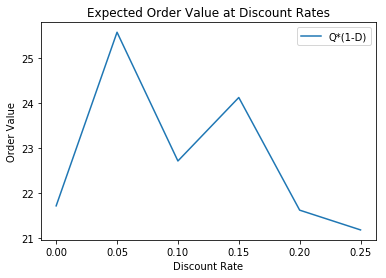

Peak order value at 25.58


In [32]:
rates=np.array([0,0.05,0.1,0.15,0.2,0.25])
means=[]
for disc in [Q_nodiscount,Q_5pc_discount,Q_10pc_discount, Q_15pc_discount, Q_20pc_discount,Q_25pc_discount]:
    means.append(np.mean(disc))
expected=np.array(means)*(1-rates)
plt.plot(rates,expected,label='Q*(1-D)')
plt.title('Expected Order Value at Discount Rates')
plt.ylabel('Order Value')
plt.xlabel('Discount Rate')
plt.legend()
plt.show()
print(f'Peak order value at {round(expected.max(),2)}')

Order Value intially increases as the increase in sales volume more than makes up for the lower per unit price but the trend reverses at discount rate of 0.20 and higher as the effect of the discounted price overtakes the increased sales volume.

A peak is observed at a discount rate 0.05. At this discount rate Order value is optimised.

## Do certain product categories sell better in the Americas or Europe?

Start by investigating the product categories and regions

In [92]:
df=pd.read_sql('''SELECT * FROM category''',conn)
df

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


In [98]:
df=pd.read_sql('''SELECT Region FROM customer''',conn)
df.Region.value_counts()

Western Europe     28
North America      16
South America      16
Southern Europe    10
British Isles       8
Central America     5
Northern Europe     4
Scandinavia         3
Eastern Europe      1
Name: Region, dtype: int64

8 categories and 9 regions. Regions will be binned by either Americas or Europe. 

Split orders by Customer region and perform 2 sided t-test to determins if there is a statistically significant difference in populations. Repeat for each category.

In [162]:
df=pd.read_sql('''SELECT  customer.region, product.categoryid, orderdetail.quantity  
FROM Orderdetail  
JOIN [order]  ON [order].ID=orderdetail.orderid
JOIN product ON product.id=orderdetail.productid
Join customer ON customer.id=[order].customerid''',conn)
df.head()

,Region,CategoryId,Quantity
0,Western Europe,4,12
1,Western Europe,5,10
2,Western Europe,4,5
3,Western Europe,7,9
4,Western Europe,7,40


In [163]:
df['USEU']=np.where(df['Region'].str.contains('America'), 'America', 'Europe')


In [164]:
df.Region.value_counts()

Western Europe     736
North America      427
South America      304
British Isles      190
Northern Europe    143
Southern Europe    137
Scandinavia         70
Central America     55
Eastern Europe      16
Name: Region, dtype: int64

In [165]:
df.USEU.value_counts()

Europe     1292
America     786
Name: USEU, dtype: int64

In [166]:
USEU=df.drop(columns='Region')